# Imports

In [19]:
from functions import *

from constants import *

from matplotlib import pyplot as plt

from skimage.metrics import *

inputFileName = "encryptedImage0.jpg"
outputFileName1 = "encryptedImage1.jpg"

# outputFileName2 = "encryptedImage2.jpg"
# outputFileName3 = "encryptedImage3.jpg"


# Encryption and Decryption

In [20]:
originalImage = load_image(basePath+inputFileName)

password, encryptedImage = encryptImage(basePath+inputFileName ,outputFileName1)

#  for decryption
inputFileName = "encryptedImage1.jpg"
outputFileName1 = "decryptedImage1.jpg"

decryptedImage = decryptImageFromArray(encryptedImage ,outputFileName1, password)



# SSIM and MSE

## SSIM = 1 for identical images

## MSE = 0 for identical images

In [21]:
""" 
======================================================================================================
                                            METRICS
======================================================================================================
"""

# ======================== SSIM (Structural Similarity Index) ===============================

# MSE between originalImage, encryptedImage
score= mean_squared_error(originalImage, encryptedImage)
print("\n\nMSE between original and encrypted=", score)

# MSE between originalImage, decryptedImage
score= mean_squared_error(originalImage, decryptedImage)
print("MSE between original and decrypted=", score)


# ======================== SSIM (Structural Similarity Index) ===============================

# SSIM between originalImage, encryptedImage
(score, diff) = structural_similarity(originalImage, encryptedImage, full=True, data_range = 255)
print("\n\nImage similarity between original and encrypted=", score)

# Compute SSIM between originalImage, encryptedImage
(score, diff) = structural_similarity(originalImage, decryptedImage, full=True, data_range=255)
print("Image similarity between original and decrypted=", score)





MSE between original and encrypted= 10491.769965161464
MSE between original and decrypted= 0.0


Image similarity between original and encrypted= 0.0195428234897992
Image similarity between original and decrypted= 1.0


# Histogram

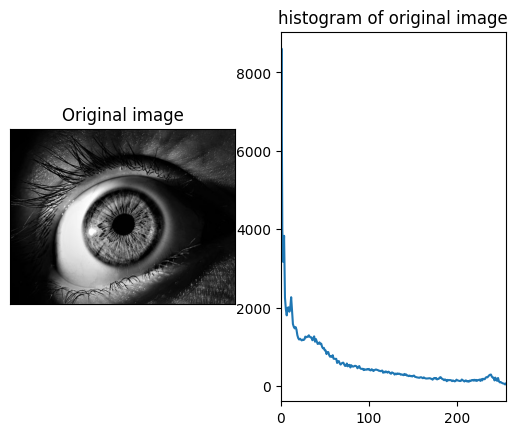

In [22]:
"""
=============================================================================================
                                        HISTOGRAM OF ORIGINAL IMAGE
=============================================================================================
"""
                                        
plt.subplot(1,2,1)
plt.imshow(originalImage,cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(originalImage.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of original image')

plt.show()

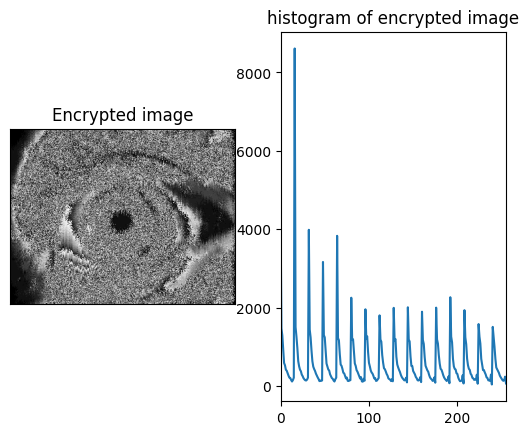

In [23]:
"""
=============================================================================================
                                        HISTOGRAM OF ENCRYPTED IMAGE
=============================================================================================
"""
                                        
plt.subplot(1,2,1)
plt.imshow(encryptedImage,cmap='gray')
plt.title('Encrypted image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(encryptedImage.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of encrypted image')

plt.show()

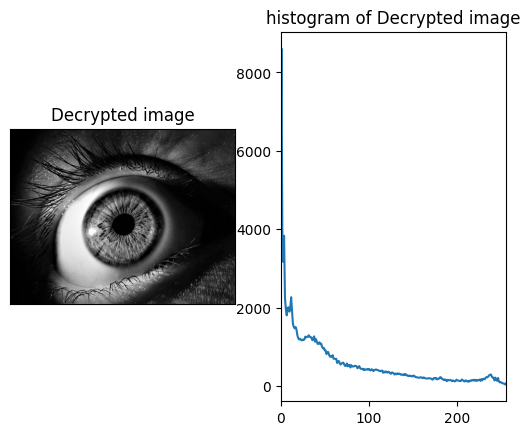

In [24]:
"""
=============================================================================================
                                        HISTOGRAM OF DECRYPTED IMAGE
=============================================================================================
"""
                                        
plt.subplot(1,2,1)
plt.imshow(decryptedImage,cmap='gray')
plt.title('Decrypted image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(decryptedImage.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of Decrypted image')

plt.show()